In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
train_data = pd.read_csv('train.csv')
train_data.info

<bound method DataFrame.info of        5  0  0.1  0.2  0.3  0.4  ...  0.612  0.613  0.614  0.615  0.616  0.617
0      0  0    0    0    0    0  ...      0      0      0      0      0      0
1      4  0    0    0    0    0  ...      0      0      0      0      0      0
2      1  0    0    0    0    0  ...      0      0      0      0      0      0
3      9  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
59994  8  0    0    0    0    0  ...      0      0      0      0      0      0
59995  3  0    0    0    0    0  ...      0      0      0      0      0      0
59996  5  0    0    0    0    0  ...      0      0      0      0      0      0
59997  6  0    0    0    0    0  ...      0      0      0      0      0      0
59998  8  0    0    0    0    0  ...      0      0      0      0      0      0

[59999 rows x 785 c

In [6]:
X_data, y_data = train_data.values[:,1:], train_data.values[:,0]
X_data = X_data / 255.0

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D, Reshape, BatchNormalization, Flatten
from keras.losses import sparse_categorical_crossentropy

In [8]:
model = Sequential()
model.add(Reshape(input_shape=(784,), target_shape=(28, 28, 1)))
model.add(Convolution2D(6, (3,3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 6)         104       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        880       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2304)              9

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .1)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2)

In [13]:
import time
start_time = time.time()

model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val,y_val))

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5
338/338 [==============================] - 2s 6ms/step - loss: 0.1663 - accuracy: 0.9505 - val_loss: 0.5508 - val_accuracy: 0.8129
Epoch 2/5
338/338 [==============================] - 2s 5ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0509 - val_accuracy: 0.9838
Epoch 3/5
338/338 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0570 - val_accuracy: 0.9819
Epoch 4/5
338/338 [==============================] - 2s 6ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0541 - val_accuracy: 0.9848
Epoch 5/5
338/338 [==============================] - 2s 5ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0585 - val_accuracy: 0.9832
--- 17.181389331817627 seconds ---


In [14]:
valid_loss, valid_acc = model.evaluate(X_test, y_test, verbose=2)
print('Valid accuracy:', valid_acc)

188/188 - 0s - loss: 0.0535 - accuracy: 0.9848
Valid accuracy: 0.9848333597183228


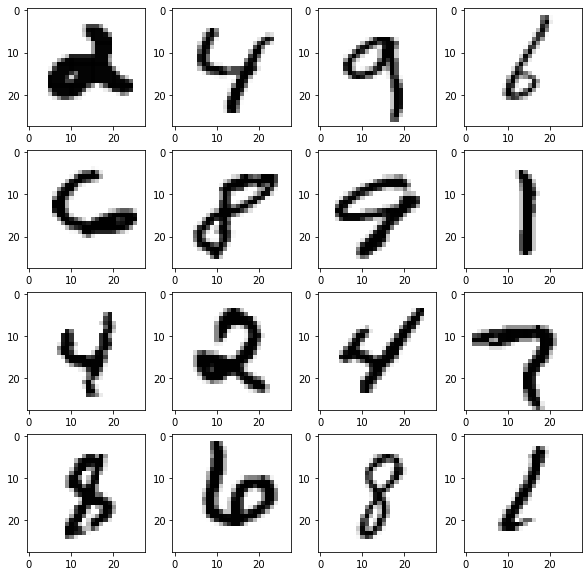

In [15]:
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 4
for i in range(0, columns*rows):
    img = np.array(X_train[i]).reshape(28,28)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, interpolation='nearest',cmap=plt.cm.gray_r)
plt.show()